## Moving Average

Moving Average는 기술적 지표중 가장 많이 사용하는 indicator중 하나이다. 단순히 추세를 볼 뿐만이 아니라, 잡음을 제거하는 필터링의 역할 또한 한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ta.trend import sma_indicator, ema_indicator, wma_indicator, macd, macd_diff, macd_signal
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2022-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


### Simple Moving Average

In [2]:
sma20 = sma_indicator(
    close = data['Close'],
    window = 20,
    fillna = False
)
sma60 = sma_indicator(
    close = data['Close'],
    window = 60,
    fillna = False
)

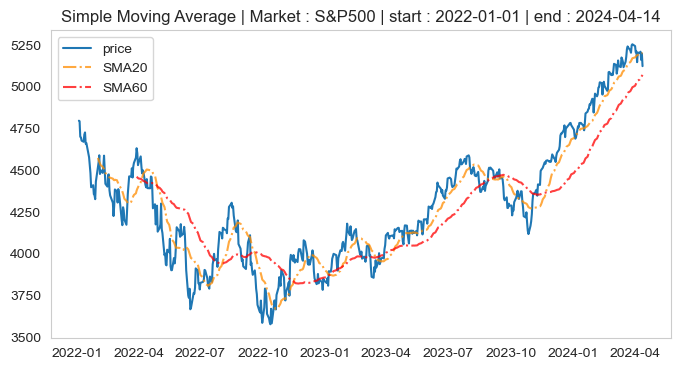

In [3]:
plt.figure(figsize = (8, 4))
plt.plot(data['Close'], label = 'price')
plt.plot(sma20, color = 'darkorange', alpha = 0.75, ls = '-.', label = 'SMA20')
plt.plot(sma60, color = 'red', alpha = 0.75, ls = '-.', label = 'SMA60')

plt.legend()
plt.grid(False)
plt.title(f'Simple Moving Average | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

### Exponentoal Moving Average

In [4]:
ema20 = ema_indicator(
    close = data['Close'],
    window = 20,
    fillna = False
)
ema60 = ema_indicator(
    close = data['Close'],
    window = 60,
    fillna = False
)

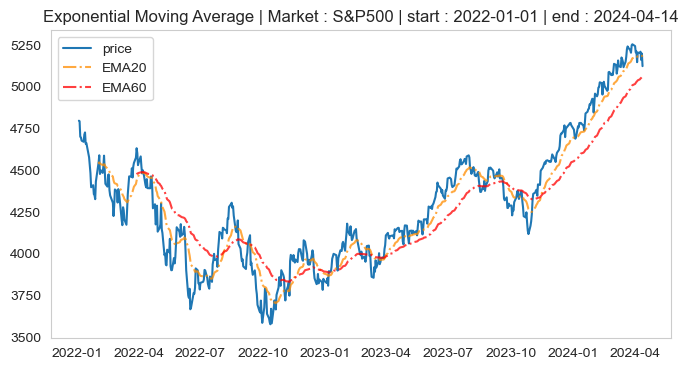

In [5]:
plt.figure(figsize = (8, 4))
plt.plot(data['Close'], label = 'price')
plt.plot(ema20, color = 'darkorange', alpha = 0.75, ls = '-.', label = 'EMA20')
plt.plot(ema60, color = 'red', alpha = 0.75, ls = '-.', label = 'EMA60')

plt.legend()
plt.grid(False)
plt.title(f'Exponential Moving Average | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

### Weighted Moving Average

In [6]:
wma20 = wma_indicator(
    close = data['Close'],
    window = 20,
    fillna = False
)
wma60 = wma_indicator(
    close = data['Close'],
    window = 60,
    fillna = False
)

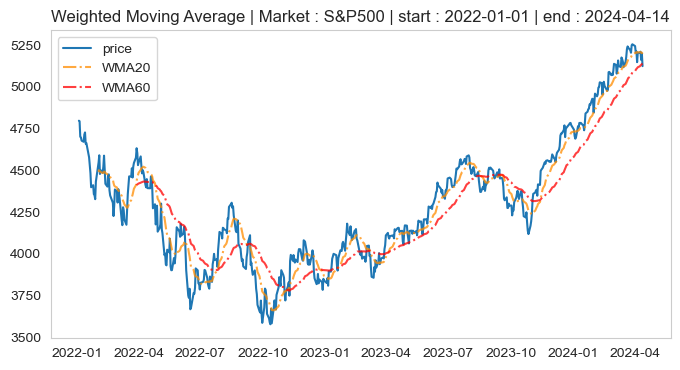

In [7]:
plt.figure(figsize = (8, 4))
plt.plot(data['Close'], label = 'price')
plt.plot(wma20, color = 'darkorange', alpha = 0.75, ls = '-.', label = 'WMA20')
plt.plot(wma60, color = 'red', alpha = 0.75, ls = '-.', label = 'WMA60')

plt.legend()
plt.grid(False)
plt.title(f'Weighted Moving Average | Market : S&P500 | start : {start_date} | end : {end_date}')
plt.show()

### Moving Average Convergence Divergence

In [8]:
macd2060 = macd(
    close = data['Close'],
    window_slow = 60,
    window_fast = 20,
    fillna = False
) 

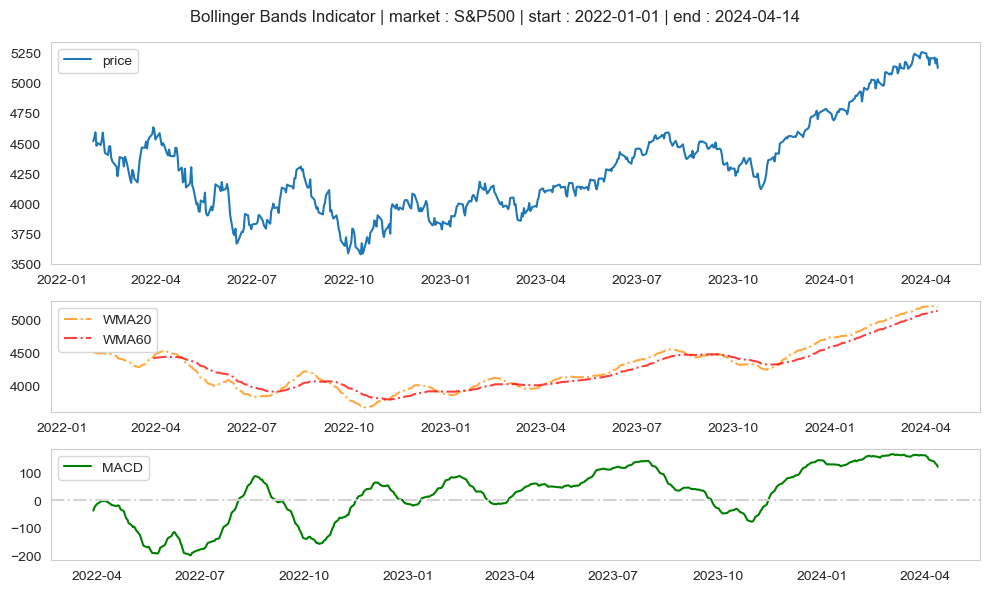

In [13]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'][19:], label = 'price')
plt.legend()
plt.grid(False)

plt.subplot(gs[1])
plt.plot(wma20, color = 'darkorange', alpha = 0.75, ls = '-.', label = 'WMA20')
plt.plot(wma60, color = 'red', alpha = 0.75, ls = '-.', label = 'WMA60')
plt.grid(False)
plt.legend(['WMA20','WMA60'])

plt.subplot(gs[2])
plt.plot(macd2060, color = 'green')
plt.grid(False)
plt.legend(['MACD'])
plt.axhline(y = 0, color = 'lightgray', ls = '-.')

plt.suptitle(f'Bollinger Bands Indicator | market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()

### Moving Average Convergence Divergence difference

MACD diff는 MACD와 Signal의 차이로 계산된다. signal은 다음과 같이 계산된다

$$\mathrm{signal}_t = \mathrm{EMA}_9(\mathrm{MACD})$$

In [14]:
diff_macd = macd_diff(
    close = data['Close'],
    window_slow = 26,
    window_fast = 12,
    window_sign = 9,
    fillna = False
)

In [19]:
signal = macd_signal(
    close = data['Close'],
    window_slow = 26,
    window_fast = 12,
    window_sign = 9,
    fillna = False
)

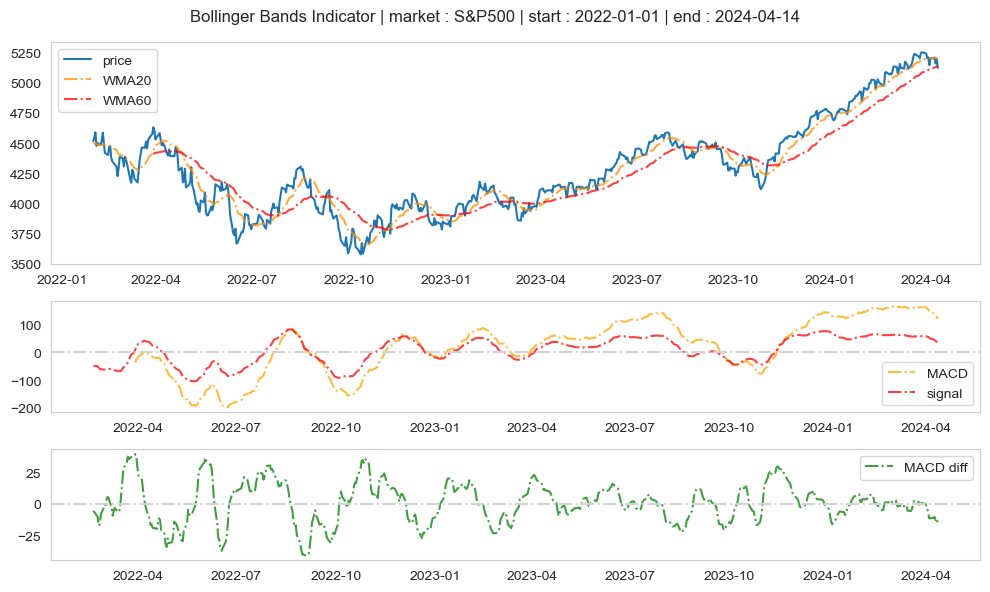

In [21]:
plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'][19:], label = 'price')
plt.plot(wma20, color = 'darkorange', alpha = 0.75, ls = '-.', label = 'WMA20')
plt.plot(wma60, color = 'red', alpha = 0.75, ls = '-.', label = 'WMA60')
plt.legend()
plt.grid(False)

plt.subplot(gs[1])
plt.plot(macd2060, color = 'orange', alpha = 0.75, ls = '-.')
plt.plot(signal, color = 'red', alpha = 0.75, ls = '-.')
plt.grid(False)
plt.legend(['MACD', 'signal'])
plt.axhline(y = 0, color = 'lightgray', ls = '-.')

plt.subplot(gs[2])
plt.plot(diff_macd, color = 'green', alpha = 0.75, ls = '-.')
plt.grid(False)
plt.axhline(y = 0, color = 'lightgray', ls = '-.')
plt.legend(['MACD diff'])

plt.suptitle(f'Bollinger Bands Indicator | market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()